In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sajalsharma0803","key":"d16930a5f71fefc13e2865de978e5e34"}'}

In [3]:
from google.colab import drive

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d manjilkarki/deepfake-and-real-images

Dataset URL: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images
License(s): unknown
100% 1.68G/1.68G [01:18<00:00, 22.8MB/s]
100% 1.68G/1.68G [01:18<00:00, 23.2MB/s]


In [ ]:
! unzip deepfake-and-real-images.zip

In [25]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model_vgg16 = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=4,
    validation_data=validation_generator
)


Found 112002 images belonging to 2 classes.
Found 7885 images belonging to 2 classes.
Epoch 1/4
3501/3501 [==============================] - 532s 151ms/step - loss: 0.3222 - accuracy: 0.8631 - val_loss: 0.2574 - val_accuracy: 0.8903
Epoch 2/4
3501/3501 [==============================] - 528s 151ms/step - loss: 0.2385 - accuracy: 0.8976 - val_loss: 0.2286 - val_accuracy: 0.9013
Epoch 3/4
3501/3501 [==============================] - 520s 148ms/step - loss: 0.2045 - accuracy: 0.9130 - val_loss: 0.2321 - val_accuracy: 0.9032
Epoch 4/4
3501/3501 [==============================] - 520s 149ms/step - loss: 0.1741 - accuracy: 0.9263 - val_loss: 0.2418 - val_accuracy: 0.9026


In [27]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionNet model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model_inception = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_inception = model_inception.fit(
    train_generator,
    epochs=4,
    validation_data=validation_generator
)



Epoch 1/4
3501/3501 [==============================] - 328s 91ms/step - loss: 0.5440 - accuracy: 0.8201 - val_loss: 0.3268 - val_accuracy: 0.8590
Epoch 2/4
3501/3501 [==============================] - 315s 90ms/step - loss: 0.3321 - accuracy: 0.8524 - val_loss: 0.3384 - val_accuracy: 0.8529
Epoch 3/4
3501/3501 [==============================] - 315s 90ms/step - loss: 0.2878 - accuracy: 0.8744 - val_loss: 0.3110 - val_accuracy: 0.8699
Epoch 4/4
3501/3501 [==============================] - 316s 90ms/step - loss: 0.2505 - accuracy: 0.8924 - val_loss: 0.3692 - val_accuracy: 0.8432


In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

# Define the custom CNN model
model_custom = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_custom.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_custom = model_custom.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
3501/3501 [==============================] - 351s 100ms/step - loss: 0.4177 - accuracy: 0.8038 - val_loss: 0.3010 - val_accuracy: 0.8714
Epoch 2/5
3501/3501 [==============================] - 339s 97ms/step - loss: 0.2401 - accuracy: 0.8985 - val_loss: 0.2061 - val_accuracy: 0.9136
Epoch 3/5
3501/3501 [==============================] - 337s 96ms/step - loss: 0.1848 - accuracy: 0.9244 - val_loss: 0.1972 - val_accuracy: 0.9237
Epoch 4/5
3501/3501 [==============================] - 338s 96ms/step - loss: 0.1550 - accuracy: 0.9380 - val_loss: 0.2245 - val_accuracy: 0.9158
Epoch 5/5
3501/3501 [==============================] - 344s 98ms/step - loss: 0.1360 - accuracy: 0.9460 - val_loss: 0.1695 - val_accuracy: 0.9344


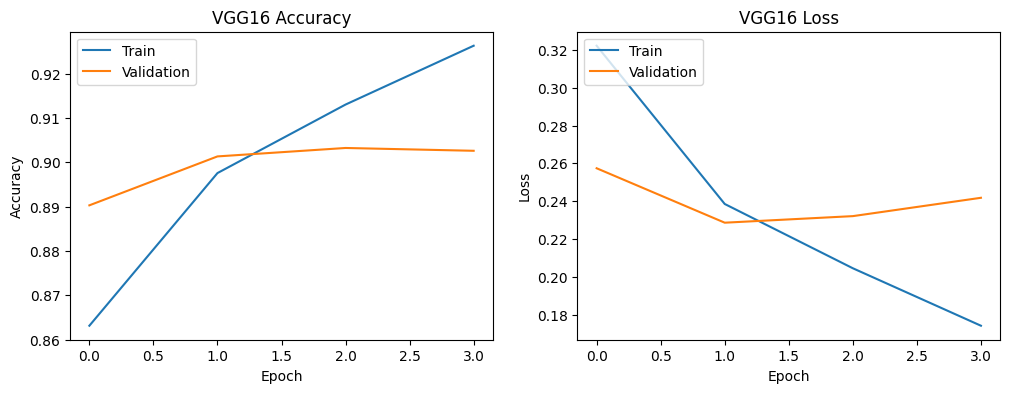

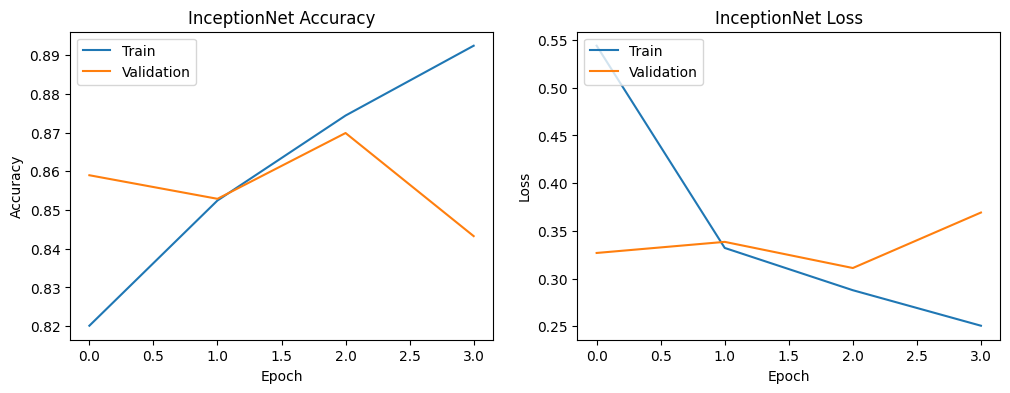

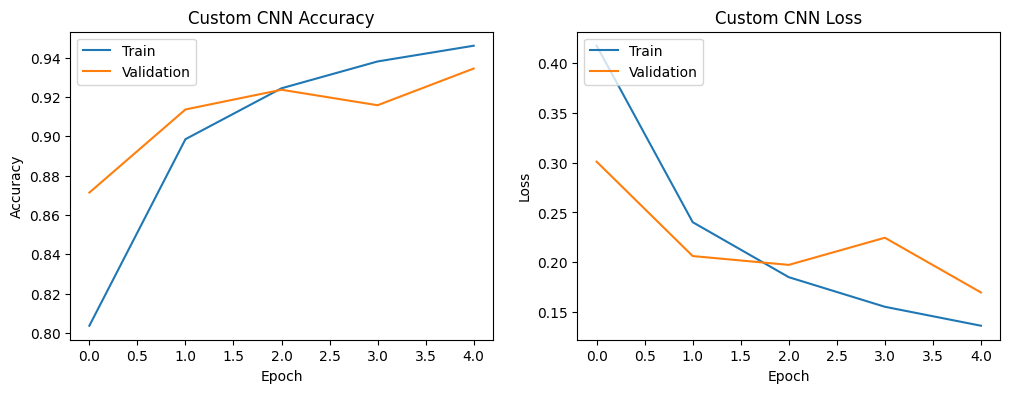

In [30]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot the training history for each model
plot_history(history_vgg16, 'VGG16')
plot_history(history_inception, 'InceptionNet')
plot_history(history_custom, 'Custom CNN')
